
# Capstone project 1: House prices advanced regression
## Exploratory Data Analysis and Story Telling

In [324]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
from ipywidgets import interact, widgets
import matplotlib.cm as cm
import matplotlib.colors as colors

import numpy as np
import pandas as pd

import pickle
import json
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import warnings
warnings.filterwarnings('ignore')

In [192]:
# LOAD clean data before applying LabelEncoder
df = pd.read_csv('./data/df_clean.csv',index_col =0).sort_values(by='SoldTime')
pd.to_datetime(df.SoldTime)
df.set_index(pd.DatetimeIndex(df['SoldTime']),inplace=True)
df = df.drop('SoldTime',axis=1)
df.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SoldTime,,,,,,,,,,,,,,,,,,,,,
2006-01-01,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,265,0,0,0,0,648,0,1,2006,181000
2006-01-01,RL,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,0,319,0,0,0,0,0,1,2006,136500
2006-01-01,RL,Pave,0,IR2,Lvl,AllPub,CulDSac,Gtl,Somerst,RRAn,...,192,267,0,0,0,0,0,1,2006,423000
2006-01-01,RL,Pave,0,IR1,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,...,468,81,0,0,0,0,0,1,2006,205000
2006-01-01,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,160,24,0,0,0,0,0,1,2006,260000


In [202]:
%matplotlib inline
sns.set()

In [193]:
df.index.min(),df.index.max()

(Timestamp('2006-01-01 00:00:00'), Timestamp('2010-07-01 00:00:00'))

In [34]:
df.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'MSSubClass', 'LotFrontage', 'LotArea',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
    

## Time Series View

In [217]:
# Time series plot of SalePrice and Bedroom number
def plot_timeseries(df,col1,col2):
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    df[col1].resample('1m').mean().plot(figsize=(20,7),linewidth=1,fontsize=20,ax=ax1,color='red')
    df[col2].resample('1m').mean().plot(figsize=(20,7),linewidth=1,fontsize=20,ax=ax2,color='k')

    ax1.legend(loc='upper right')
    ax2.legend(loc='lower right')
    ax1.set_ylabel('Average '+col1,fontsize=25)
    ax2.set_ylabel('Average '+col2,fontsize=25)
    plt.xlabel('Time',fontsize=25)
    plt.xticks(rotation=45)
    plt.show()

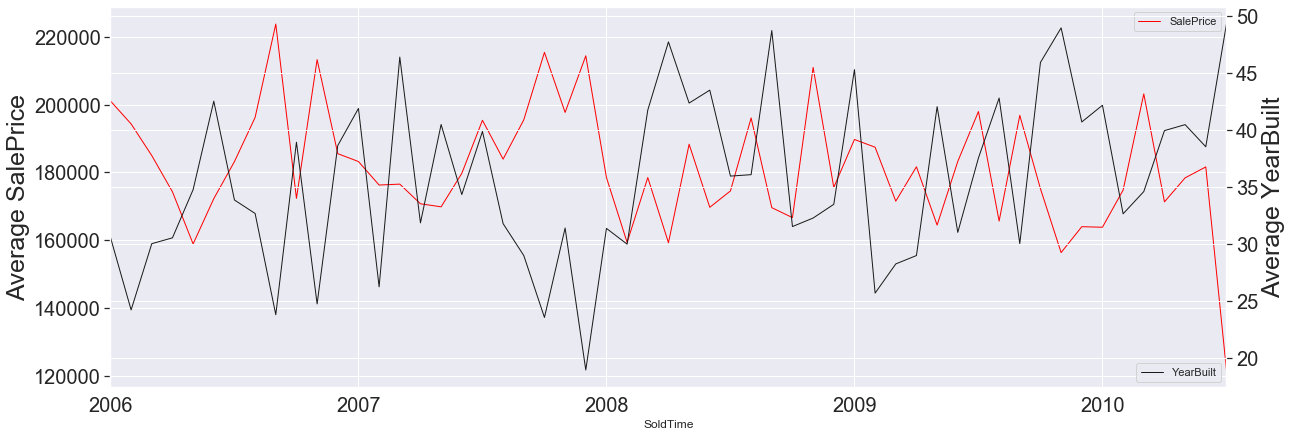

In [218]:
# Time series plot of SalePrice and house age
plot_timeseries(df,'SalePrice','YearBuilt')


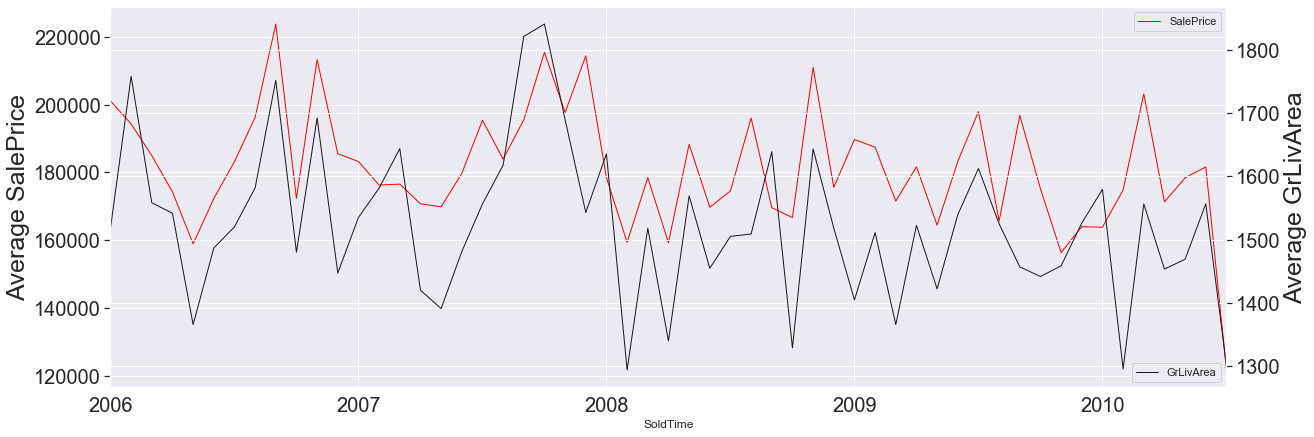

In [221]:
# Time series plot of SalePrice and overall quality
plot_timeseries(df,'SalePrice','GrLivArea')


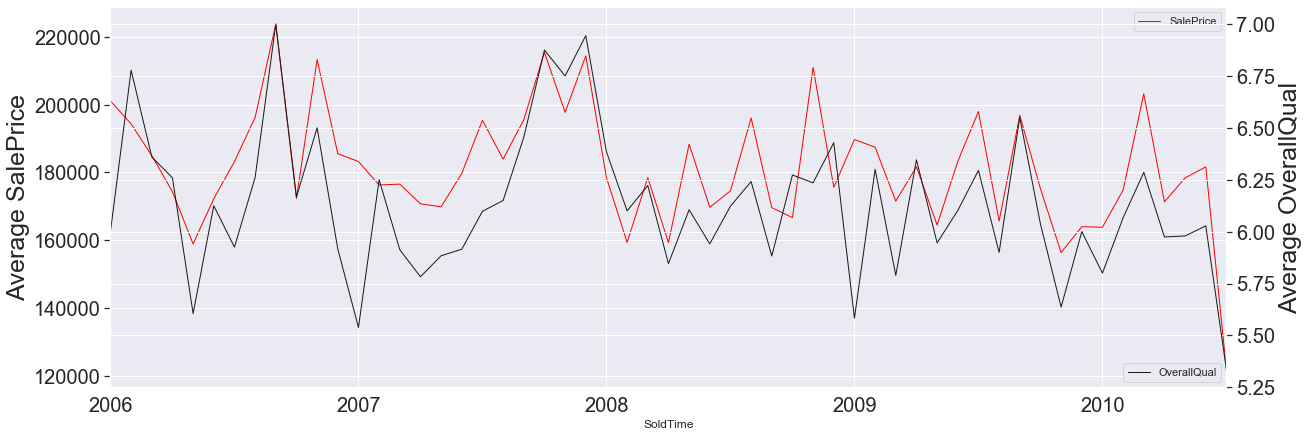

In [222]:
plot_timeseries(df,'SalePrice','OverallQual')

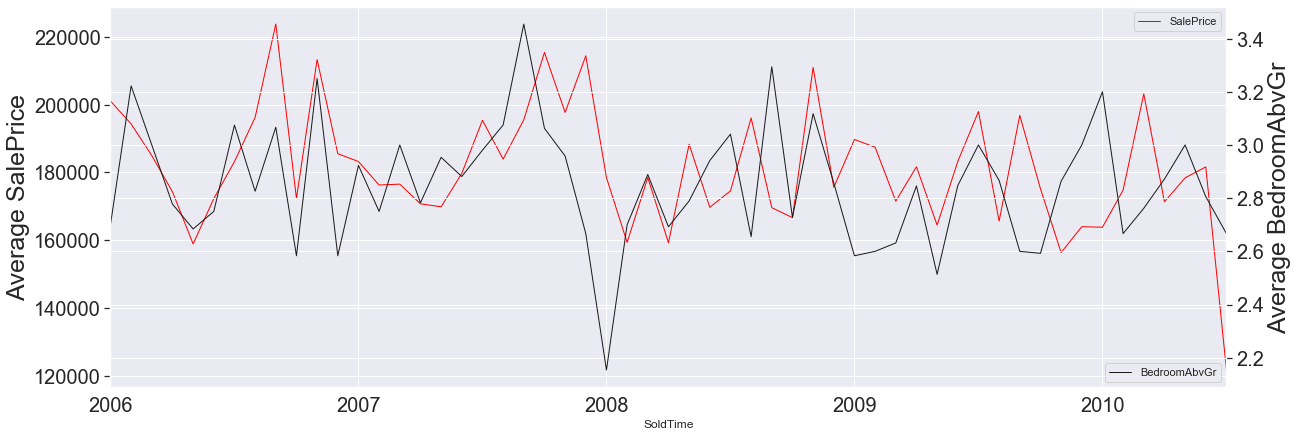

In [219]:
plot_timeseries(df,'SalePrice','BedroomAbvGr')

## Case study (Hypothesis-driven study): bedroom number effect

In [90]:
# Step-1: Plot the ralationship of SalePrice with Living Area with BedRoom information

def plot_bedroom(df):
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
    colors = dict(zip(df.BedroomAbvGr.unique(),np.array(['C'+str(s) for s in range(len(df.BedroomAbvGr.unique()))])))
    plt.scatter(df.GrLivArea, df.SalePrice,
                s=df.BedroomAbvGr*20,
                c=df.BedroomAbvGr.replace(colors),alpha=0.5)

    for i in range(len(df.BedroomAbvGr.unique())):
        plt.scatter(0,0,
                    c = colors[df.BedroomAbvGr.unique()[i]], alpha=0.5,
                    label=df.BedroomAbvGr.unique()[i])
    ax.set_xlim(left=100)
    ax.set_ylim(df.SalePrice.min()-3,df.SalePrice.max()+3)
    plt.legend(title='Bedroom No.')
    plt.xlabel('GrLivArea')
    plt.ylabel('SalePrice ')
    plt.show()

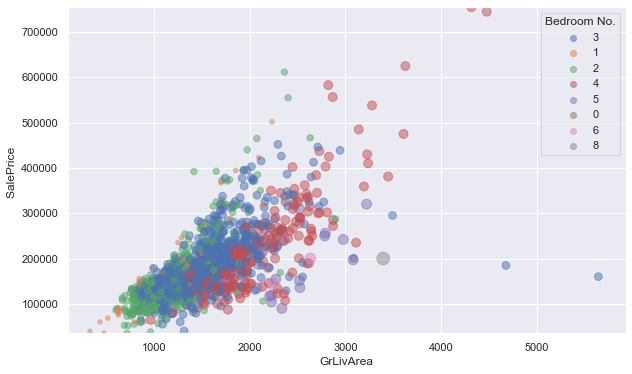

In [91]:
# Step-1: Plot the ralationship of SalePrice with Living Area, use BedRoom as color information
plot_bedroom(df)

In [281]:
# Plot bar graph of mean value of SalePrice with for each bedroom number
def plot_mean_sd(df,col):
    mean = df.groupby(col).SalePrice.mean()
    sd = df.groupby(col).SalePrice.std()
    ax = mean.plot(kind='bar', fill=True, color = 'lightblue', linewidth = 1, yerr=sd, capsize=6)
    
    rgline = sm.OLS(df[col],df.SalePrice)
    r = rgline.fit()
    print(r.summary())
    plt.ylabel('Sale Price')
    #ax.set_facecolor("white")
    
    ax.tick_params(direction='out', length=8, width=2, colors='k')
    ax.spines['left'].set_color('k')
    ax.spines['bottom'].set_color('k')
    plt.ylim([0,400000])
    sns.regplot(x=col,y='SalePrice',scatter=False,data=df,ax=ax)
    

                                 OLS Regression Results                                
Dep. Variable:           BedroomAbvGr   R-squared (uncentered):                   0.885
Model:                            OLS   Adj. R-squared (uncentered):              0.885
Method:                 Least Squares   F-statistic:                              6002.
Date:                Sun, 01 Sep 2019   Prob (F-statistic):                        0.00
Time:                        09:30:32   Log-Likelihood:                         -1023.2
No. Observations:                 782   AIC:                                      2048.
Df Residuals:                     781   BIC:                                      2053.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

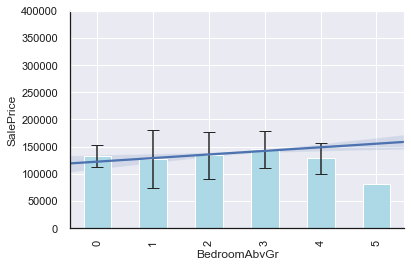

In [282]:
# Plot data with living area below 1500 sf
df1500L = df[df.GrLivArea < 1500]
plot_mean_sd(df1500L,'BedroomAbvGr')
print('Houses with living area below 1500 square feet:{}'.format(df1500L.shape[0]))
br_stats = ols('SalePrice ~ BedroomAbvGr', data=df1500L).fit()
anova = sm.stats.anova_lm(br_stats, typ=2)
print('\nANOVA analysis \n',anova)


In [231]:
# Pairwise Tukey HSD analysis for mean
print(pairwise_tukeyhsd(df1500L.SalePrice, df1500L.BedroomAbvGr, alpha=0.025))

      Multiple Comparison of Means - Tukey HSD, FWER=0.02      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
     0      1  -5766.2162    0.9  -78551.7245 67019.2921  False
     0      2    839.1771    0.9  -69527.3369 71205.6911  False
     0      3  11858.1415    0.9  -58387.9258 82104.2088  False
     0      4  -4012.0909    0.9  -78635.3908 70611.2089  False
     0      5    -51653.0 0.8344 -191658.7207 88352.7207  False
     1      2   6605.3933    0.9  -14569.4882 27780.2748  False
     1      3  17624.3577 0.0796   -3146.7588 38395.4743  False
     1      4   1754.1253    0.9  -30888.8861 34397.1367  False
     1      5 -45886.7838 0.8262 -168762.8642 76989.2966  False
     2      3  11018.9644 0.0023    1790.9986 20246.9303   True
     2      4   -4851.268    0.9  -31670.7062 21968.1702  False
     2      5 -52492.1771  0.719 -173951.0063 68966.6522  False
     3      4 -15870.2324 0.4077  -42372

                                 OLS Regression Results                                
Dep. Variable:           BedroomAbvGr   R-squared (uncentered):                   0.793
Model:                            OLS   Adj. R-squared (uncentered):              0.793
Method:                 Least Squares   F-statistic:                              2584.
Date:                Sun, 01 Sep 2019   Prob (F-statistic):                   8.30e-233
Time:                        09:30:58   Log-Likelihood:                         -1238.7
No. Observations:                 675   AIC:                                      2479.
Df Residuals:                     674   BIC:                                      2484.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

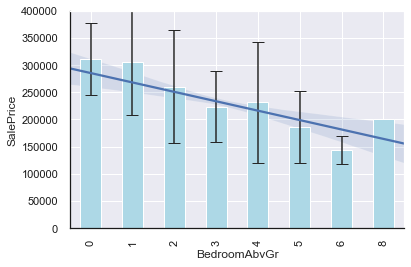

In [283]:
# Plot data with living area above 1500 sf
df1500U = df[df.GrLivArea > 1500]
plot_mean_sd(df1500U,'BedroomAbvGr')
print('Houses with living area above 1500 square feet:{}'.format(df1500U.shape[0]))
br_stats = ols('SalePrice ~ BedroomAbvGr', data=df1500U).fit()
anova = sm.stats.anova_lm(br_stats, typ=2)
print('ANOVA analysis \n',anova)


In [233]:
print(pairwise_tukeyhsd(df1500U.SalePrice, df1500U.BedroomAbvGr, alpha=0.025))

       Multiple Comparison of Means - Tukey HSD, FWER=0.03       
group1 group2   meandiff   p-adj     lower        upper    reject
-----------------------------------------------------------------
     0      1   -5463.3333    0.9 -183353.6785 172427.0118  False
     0      2  -50298.0145    0.9 -214094.9474 113498.9185  False
     0      3  -86825.1878 0.6258 -247820.3807  74170.0052  False
     0      4  -79340.5218 0.7199 -240943.0847   82262.041  False
     0      5 -124523.3333 0.2594 -296477.6105  47430.9438  False
     0      6 -166554.3333 0.0873 -358207.0777  25098.4111  False
     0      8 -110333.3333    0.9 -431029.7138 210363.0471  False
     1      2  -44834.6812 0.6362 -128806.8547  39137.4924  False
     1      3  -81361.8544 0.0167 -159728.5747  -2995.1342   True
     1      4  -73877.1885 0.0511 -153484.2171   5729.8401  False
     1      5    -119060.0 0.0023 -218005.2582 -20114.7418   True
     1      6    -161091.0 0.0015 -291293.4006 -30888.5994   True
     1    

In [277]:
# Plot bar graph of mean value of SalePrice with for each bedroom number
def plot_BR_corr(df,col):
    mean = df.groupby('BedroomAbvGr')[col].mean()
    sd = df.groupby('BedroomAbvGr')[col].std()
    ax = mean.plot(kind='bar', fill=True, color = 'lightblue', linewidth = 1, yerr=sd, capsize=6)
    
    sns.regplot(x='BedroomAbvGr',y=col,scatter=False,data=df,ax=ax)
    
    rgline = sm.OLS(df.BedroomAbvGr,df[col])
    r = rgline.fit()
    print(r.summary())
    plt.ylabel(col)
    
    ax.tick_params(direction='out', length=8, width=2, colors='k')
    ax.spines['right'].set_color('white')
    ax.spines['top'].set_color('white')
    
    

                                 OLS Regression Results                                
Dep. Variable:           BedroomAbvGr   R-squared (uncentered):                   0.928
Model:                            OLS   Adj. R-squared (uncentered):              0.928
Method:                 Least Squares   F-statistic:                              8695.
Date:                Sun, 01 Sep 2019   Prob (F-statistic):                        0.00
Time:                        09:22:11   Log-Likelihood:                         -882.19
No. Observations:                 675   AIC:                                      1766.
Df Residuals:                     674   BIC:                                      1771.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

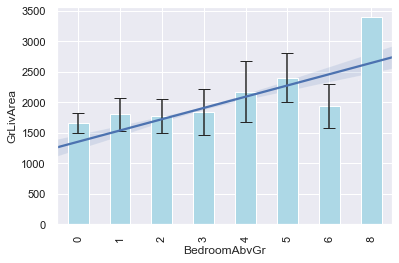

In [280]:
plot_BR_corr(df1500U,'GrLivArea')

                                 OLS Regression Results                                
Dep. Variable:           BedroomAbvGr   R-squared (uncentered):                   0.506
Model:                            OLS   Adj. R-squared (uncentered):              0.506
Method:                 Least Squares   F-statistic:                              691.5
Date:                Sun, 01 Sep 2019   Prob (F-statistic):                   2.02e-105
Time:                        09:21:02   Log-Likelihood:                         -1532.2
No. Observations:                 675   AIC:                                      3066.
Df Residuals:                     674   BIC:                                      3071.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

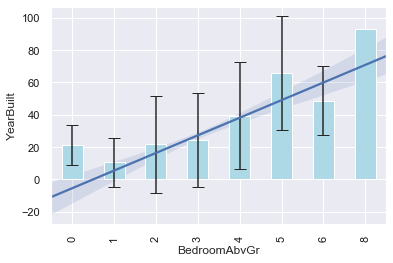

In [278]:
plot_BR_corr(df1500U,'YearBuilt')

                                 OLS Regression Results                                
Dep. Variable:           BedroomAbvGr   R-squared (uncentered):                   0.879
Model:                            OLS   Adj. R-squared (uncentered):              0.879
Method:                 Least Squares   F-statistic:                              4889.
Date:                Sun, 01 Sep 2019   Prob (F-statistic):                   3.97e-311
Time:                        09:21:34   Log-Likelihood:                         -1058.1
No. Observations:                 675   AIC:                                      2118.
Df Residuals:                     674   BIC:                                      2123.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

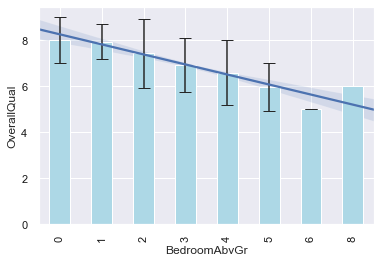

In [279]:
plot_BR_corr(df1500U,'OverallQual')

### Simulation using predicting model

In [289]:
# Load model
model = pickle.load(open('./models/xgb_model_mse.dat', 'rb'))

In [379]:
# Load processed data
X = pd.read_csv('./data/X_train.csv',index_col=0)
y = pd.read_csv('./data/y_train.csv',index_col=0)


In [390]:
df = X.join(y).sort_values('BedroomAbvGr')
df.head()

,x0_0.0,x0_1.0,x0_2.0,x0_3.0,x0_4.0,x1_0.0,x1_1.0,x2_0.0,x2_1.0,x2_2.0,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
168,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.312719,0.000000,0.0,0.0,0.0,0.0,0.00000,0.272727,1.00,0.312595
628,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.308051,0.102377,0.0,0.0,0.0,0.0,0.03871,0.454545,1.00,0.151507
991,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.102684,0.000000,0.0,0.0,0.0,0.0,0.00000,0.363636,0.00,0.152895
741,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.140023,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.50,0.102845
681,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.000000,0.109689,0.0,0.0,0.0,0.0,0.00000,0.545455,0.75,0.648434


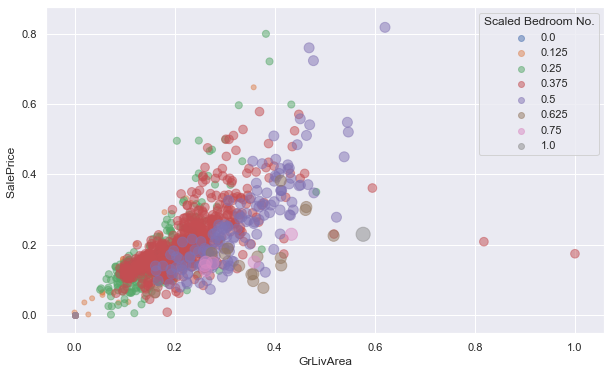

In [391]:
def plot_bedroom_scaled(df):
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
    colors = dict(zip(df.BedroomAbvGr.unique(),np.array(['C'+str(s) for s in range(len(df.BedroomAbvGr.unique()))])))
    plt.scatter(df.GrLivArea, df.SalePrice,
                s=df.BedroomAbvGr*200,
                c=df.BedroomAbvGr.replace(colors),alpha=0.5)

    for i in range(len(df.BedroomAbvGr.unique())):
        plt.scatter(0,0,
                    c = colors[df.BedroomAbvGr.unique()[i]], alpha=0.5,
                    label=df.BedroomAbvGr.unique()[i])


    plt.legend(title='Scaled Bedroom No.')
    plt.xlabel('GrLivArea')
    plt.ylabel('SalePrice ')
    plt.show()
plot_bedroom_scaled(df)

In [365]:
# Silution algorithem:
# only change bedroom number and with others not altered:

def simulate_bedroom_1(df_s):
    n = df_s.shape[0]

    df_s['BedroomAbvGr'] = [np.random.randint(1,8)/8 for i in range(n)] # randomize bedroom numbers 

    # add one more criteria to make random bedroom number more realistic
    for i in range(n):
        if df_s.iloc[i]['BedroomAbvGr'] > df_s.iloc[i]['GrLivArea']/400:
            df_s.iloc[i]['BedroomAbvGr']=int(df_s.iloc[i]['GrLivArea']/400)
    
    return df_s

In [401]:
# simulation with other features the same value but only assign bedroom numbers randomly.

def simulation(df_s,factor):
    n = df_s.shape[0]
    loc = np.random.randint(0,n)
    data = df_s.iloc[loc] # choose a random number to assign all the other attributes
    print(loc, data.GrLivArea)
    
    for col in df_s.columns:
        if col == factor:
            maxvar = int(df_s[col].max()*200)
            df_s[col] = [float(np.random.randint(1,maxvar))/200 for i in range(n)] # randomize bedroom numbers with MinMaxScaler

        else:
            df_s[col] = [data[col] for i in range(n)]
    
    return df_s

In [312]:
def simulation_price(model,df_new):
    X = df_new
    df_new['SalePrice'] = model.predict(X)
    
    return df_new.sort_values(by=['BedroomAbvGr'])

In [330]:
# Plot bar graph of mean value of SalePrice with for each bedroom number
def plot_mean_sd_p(df,col):
    mean = df.groupby(col).SalePrice.mean()
    sd = df.groupby(col).SalePrice.std()
    ax = mean.plot(kind='bar', fill=True, color = 'lightblue', linewidth = 1, yerr=sd, capsize=6)
    
    ax.tick_params(direction='out', length=8, width=2, colors='k')
    ax.spines['left'].set_color('k')
    ax.spines['bottom'].set_color('k')
    sns.regplot(x=col,y='SalePrice',scatter=False,data=df,ax=ax)

56 0.5766767143933684
145 0.26978146194423513
75 0.18123587038432554


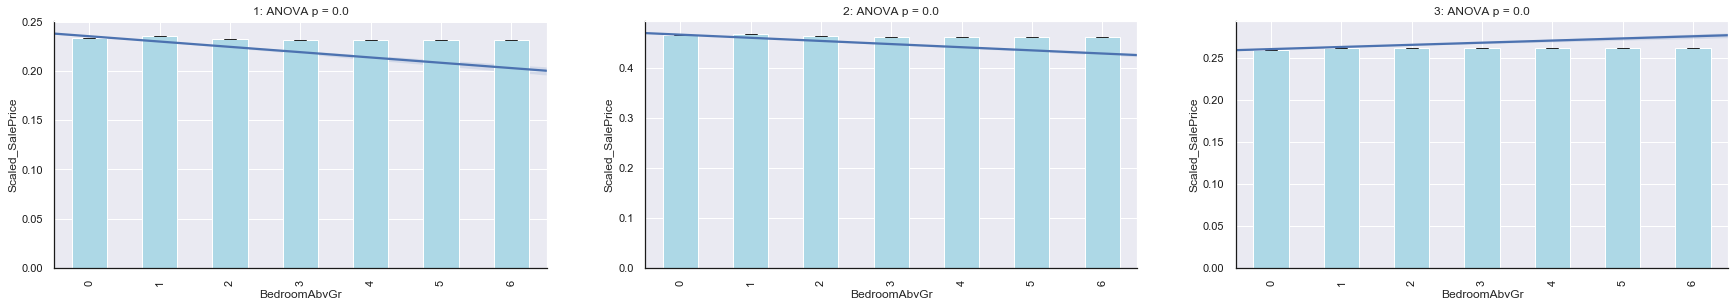

In [403]:
fig = plt.figure(figsize=(30,10))
df1=X.loc[X.GrLivArea>0.15] # Get the data with GrLivArea bigger than 1500
for i in range(1,4):
    df_new = simulation(df1[200*(i-1):200*i],'BedroomAbvGr')
    df_new2 = simulation_price(model,df_new)
    
    #Add ANOVA analysis
    new_stats = ols('SalePrice ~ BedroomAbvGr', data=df_new2).fit()
    aov = sm.stats.anova_lm(new_stats, typ=2)
    name = str(i)+': ANOVA p = '+str(round(aov['PR(>F)']['BedroomAbvGr'],5))
    
    #plot mean
    ax = fig.add_subplot(2,3,i)
    plot_mean_sd_p(df_new2,'BedroomAbvGr')
    ax.set_title(name)
    ax.set_ylabel('Scaled_SalePrice')
    ax.set_xticklabels([0,1,2,3,4,5,6,7,8])


171 0.30614167294649586
183 0.4291635267520724
56 0.2722305953278071


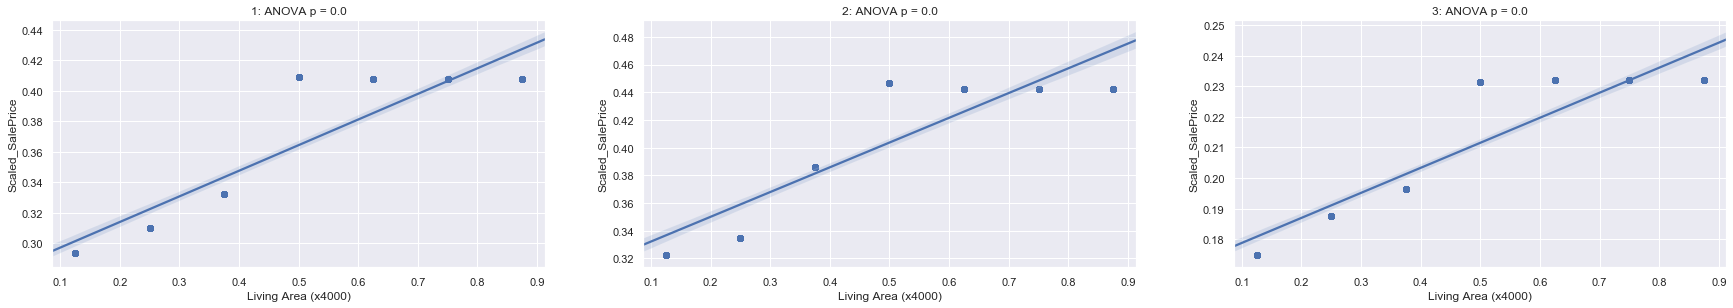

In [404]:
fig = plt.figure(figsize=(30,10))
df1=X.loc[X.GrLivArea>0.15] # Get the data with GrLivArea bigger than 1500
for i in range(1,4):
    df_new = simulation(df1[200*(i-1):200*i],'GrLivArea')
    df_new2 = simulation_price(model,df_new)
    
    #Add ANOVA analysis
    new_stats = ols('SalePrice ~ GrLivArea', data=df_new2).fit()
    aov = sm.stats.anova_lm(new_stats, typ=2)
    name = str(i)+': ANOVA p = '+str(round(aov['PR(>F)']['GrLivArea'],5))
    
    #plot mean
    ax = fig.add_subplot(2,3,i)

    sns.regplot(x='GrLivArea',y='SalePrice',scatter=True,data=df_new2,ax=ax)
    ax.set_title(name)
    ax.set_ylabel('Scaled_SalePrice')
    ax.set_xlabel('Living Area (x4000)')

In [358]:
def simulate_YearBuilt(df_s):
    n = df_s.shape[0]

    df_s['YearBuilt'] = [np.random.randint(0,40) for i in range(n)] 
    
    return df_s

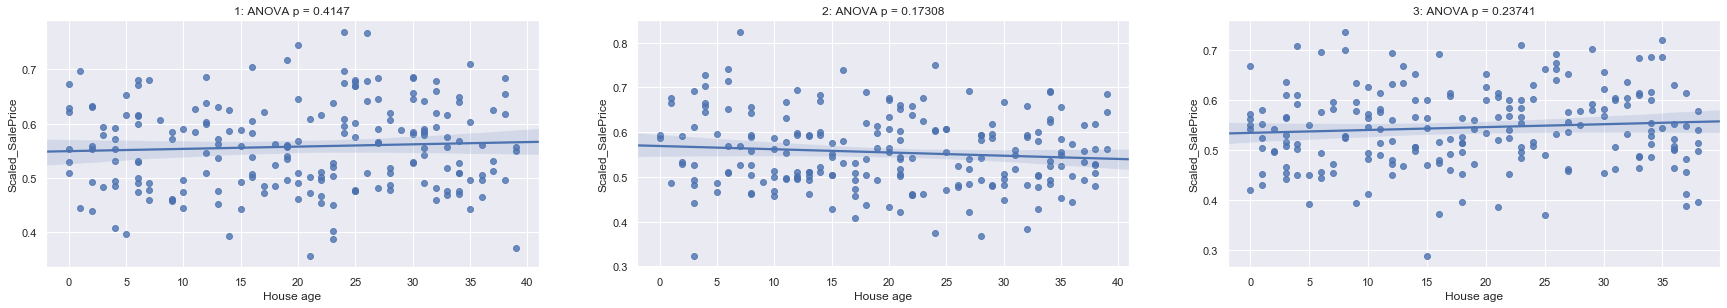

In [361]:
fig = plt.figure(figsize=(30,10))
df1=X.loc[X.GrLivArea>1500] # Get the data with GrLivArea bigger than 1500
for i in range(1,4):
    df_new = simulate_YearBuilt(df1[200*(i-1):200*i])
    df_new2 = simulation_price(model,df_new)
    
    #Add ANOVA analysis
    new_stats = ols('SalePrice ~ YearBuilt', data=df_new2).fit()
    aov = sm.stats.anova_lm(new_stats, typ=2)
    name = str(i)+': ANOVA p = '+str(round(aov['PR(>F)']['YearBuilt'],5))
    
    #plot mean
    ax = fig.add_subplot(2,3,i)

    sns.regplot(x='YearBuilt',y='SalePrice',scatter=True,data=df_new2,ax=ax)
    ax.set_title(name)
    ax.set_ylabel('Scaled_SalePrice')
    ax.set_xlabel('House age')